In [2]:
import mysql.connector
import pandas as pd


In [ ]:
#connection to database

con = mysql.connector.connect(
    host="localhost",
    port = 3306,          
    user="root",
    password="",
    database="SQL_Project")

In [4]:
#test query

pd.read_sql("select * FROM orders", con)

C:\Users\Surya Pavan\AppData\Local\Temp\ipykernel_18060\1942165699.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("select * FROM orders", con)


,order_id,customer_id,order_date,total_amount
0,5001,1,2024-06-25,250000.0
1,5002,2,2024-06-24,120000.0
2,5003,3,2024-06-23,90000.0
3,5004,4,2024-06-22,45000.0
4,5005,5,2024-06-21,50000.0
5,5006,6,2024-06-20,62000.0
6,5007,7,2024-06-19,30000.0
7,5008,8,2024-06-18,98000.0
8,5009,9,2024-06-17,40000.0
9,5010,10,2024-06-16,20000.0


In [ ]:
# Load all tables into DataFrames
df_customers = pd.read_sql("Select * from customers",con)


C:\Users\Surya Pavan\AppData\Local\Temp\ipykernel_3092\1508798838.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customers = pd.read_sql("Select * from customers",con)


In [11]:
df_orders = pd.read_sql("Select * from orders",con)
df_products = pd.read_sql("Select * from product",con)
df_orderitems = pd.read_sql("Select * from orderitems",con)

C:\Users\Surya Pavan\AppData\Local\Temp\ipykernel_3092\2849187768.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_orders = pd.read_sql("Select * from orders",con)
C:\Users\Surya Pavan\AppData\Local\Temp\ipykernel_3092\2849187768.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_products = pd.read_sql("Select * from product",con)
C:\Users\Surya Pavan\AppData\Local\Temp\ipykernel_3092\2849187768.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_orderitems = pd.read_sql("Select * from orderitems",con)


In [13]:
merged = df_orders.merge(df_orderitems, on='order_id')
merged = merged.merge(df_products, on='product_id')
merged = merged.merge(df_customers, on='customer_id')

In [15]:
#Total Sales by Product:

product_sales = merged.groupby("name_x")["quantity"].sum().reset_index()
product_sales.columns = ['Product', 'Total Quantity Sold']
print(product_sales)

              Product  Total Quantity Sold
0     Air Conditioner                    1
1   Bluetooth Speaker                    1
2         Camera DSLR                    1
3        Coffee Maker                    1
4          Desk Chair                    1
5        Drone Camera                    1
6     Electric Kettle                    1
7      Ethernet Cable                    3
8        External HDD                    1
9        Fitness Band                    2
10       Game Console                    1
11    Gaming Keyboard                    1
12       Gaming Mouse                    2
13      Graphics Card                    1
14         Headphones                    1
15      Ink Cartridge                    2
16           Keyboard                    4
17         LED TV 32"                    1
18         LED TV 50"                    1
19             Laptop                    2
20       Laptop Stand                    2
21  Memory Card 128GB                    3
22     Micr

<Axes: title={'center': 'Monthly Revenue'}, xlabel='order_date'>

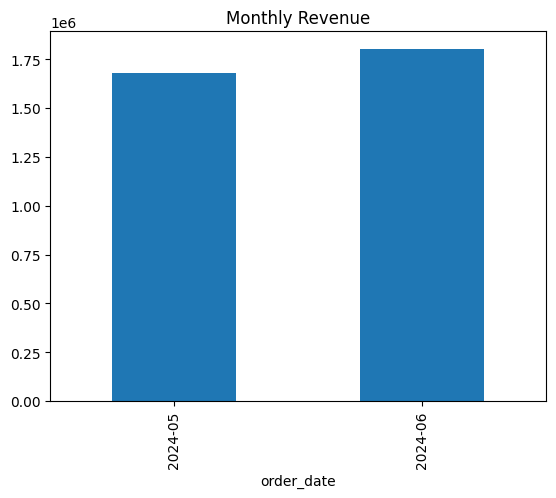

In [16]:
# Monthly Revenue Trend:

df_orders["order_date"] = pd.to_datetime(df_orders['order_date'])
monthly = df_orders.groupby(df_orders['order_date'].dt.to_period('M'))['total_amount'].sum()
monthly.plot(kind='bar', title='Monthly Revenue')

In [17]:
merged

,order_id,customer_id,order_date,total_amount,item_id,product_id,quantity,name_x,category,price,name_y,email,location
0,5001,1,2024-06-25,250000.0,1,101,2,Laptop,Electronics,75000.0,John Doe,john1@example.com,New York
1,5001,1,2024-06-25,250000.0,51,102,2,Smartphone,Electronics,50000.0,John Doe,john1@example.com,New York
2,5002,2,2024-06-24,120000.0,2,102,1,Smartphone,Electronics,50000.0,Jane Smith,jane2@example.com,Los Angeles
3,5003,3,2024-06-23,90000.0,3,103,3,Tablet,Electronics,30000.0,Alice Johnson,alice3@example.com,Chicago
4,5004,4,2024-06-22,45000.0,4,104,1,Monitor,Electronics,15000.0,Bob Brown,bob4@example.com,Houston
5,5005,5,2024-06-21,50000.0,5,105,4,Keyboard,Accessories,1200.0,Charlie Davis,charlie5@example.com,Phoenix
6,5006,6,2024-06-20,62000.0,6,106,2,Mouse,Accessories,800.0,Diana Clark,diana6@example.com,Philadelphia
7,5007,7,2024-06-19,30000.0,7,107,1,Printer,Electronics,8500.0,Ethan Lewis,ethan7@example.com,San Antonio
8,5008,8,2024-06-18,98000.0,8,108,2,Scanner,Electronics,6000.0,Fiona Walker,fiona8@example.com,San Diego
9,5009,9,2024-06-17,40000.0,9,109,1,Desk Chair,Furniture,4500.0,George Hall,george9@example.com,Dallas


In [20]:
#Top 5 Best-Selling Products (by quantity)

top_products = merged.groupby("name_x")["quantity"].sum().sort_values(ascending=False).head(5).reset_index()
print(top_products)

              name_x  quantity
0     USB Drive 64GB         5
1           Keyboard         4
2       Mobile Stand         4
3             Webcam         3
4  Memory Card 128GB         3


In [24]:
#last 5 Best-Selling Products (by quantity)
last_products = merged.groupby("name_x")["quantity"].sum().sort_values(ascending=False).tail(5).reset_index()
print(last_products)

            name_x  quantity
0       Smart Plug         1
1       VR Headset         1
2  Washing Machine         1
3   Water Purifier         1
4       Whiteboard         1


In [29]:
#Revenue by Product
merged['revenue'] = merged["quantity"]*merged["price"]
revenue_by_product = merged.groupby("name_x")["revenue"].sum().sort_values(ascending=False).reset_index()
print(revenue_by_product)

               name_x   revenue
0          Smartphone  150000.0
1              Laptop  150000.0
2              Tablet   90000.0
3        Drone Camera   80000.0
4          VR Headset   60000.0
5         Camera DSLR   55000.0
6        Game Console   45000.0
7        Refrigerator   42000.0
8     Air Conditioner   38000.0
9          LED TV 50"   35000.0
10      Graphics Card   30000.0
11    Washing Machine   30000.0
12          Projector   25000.0
13     Microwave Oven   18000.0
14         LED TV 32"   17000.0
15            Monitor   15000.0
16        Smart Watch   15000.0
17     Network Switch   14000.0
18            Scanner   12000.0
19     Water Purifier   10500.0
20        Office Desk    9500.0
21            Printer    8500.0
22       Fitness Band    8000.0
23             Webcam    7500.0
24           Speakers    7000.0
25       Gaming Mouse    6400.0
26            Toaster    6000.0
27       Coffee Maker    5500.0
28           Keyboard    4800.0
29         Desk Chair    4500.0
30      

In [30]:
#Top 5 Customers by Total Spend

Top_customers = merged.groupby("name_y")["revenue"].sum().sort_values(ascending=False).head(5).reset_index

In [31]:
Top_customers

<bound method Series.reset_index of name_y
John Doe         250000.0
Alice Johnson     90000.0
Penny Cooper      80000.0
Owen Kelly        60000.0
Hazel Hughes      55000.0
Name: revenue, dtype: float64>

In [32]:
merged.to_csv("cleaned_sales_data.csv", index=False)